# MVA diagnostics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
!less ../data/GK_modes/README

7=Dispersion relations
The titles are self explanatory. The relevant columns are 
1 kpar rho_i (this values is arbitrary)
2 kperp rho_i
8 omega / kpar vA
9 gamma / kpar vA
17-22 Re(Bx), Im(Bx), …, Im(Bz)
(END) 

In [26]:
pwd

'/Volumes/yuguang_sd/report/laplace_fourier_analysis/python/Draft'

In [5]:
b001_alfven_files = '../data/GK_modes/solgk_alf_b001_cb_ext.eig'
b1_alfven_files = '../data/GK_modes/solgk_alf_b1.eig'
b001_slow_files = '../data/GK_modes/solgk_slow_b001.eig'
b1_slow_files = '../data/GK_modes/solgk_slow_b1.eig'

In [7]:
b001_alfven_data = np.loadtxt(b001_alfven_files)
b1_alfven_data = np.loadtxt(b1_alfven_files)
b001_slow_data = np.loadtxt(b001_slow_files)
b1_slow_data = np.loadtxt(b1_slow_files)

In [12]:
data_list = [b001_alfven_data, b001_slow_data, b1_alfven_data, b1_slow_data]
kperp_list, kpar_list, mva_list = [], [], []
w_list, gamma_list = [], []
for data in data_list:
    kperp = data[:, 1]
    Ebperp = np.sum( data[:, 16:20]**2 , axis = 1)
    Ebpar = np.sum( data[:, 20:22]**2 , axis = 1)
    mva = Ebperp/Ebpar
    kperp_list.append(kperp)
    mva_list.append(mva)
    w_list.append(data[:, 7])
    gamma_list.append(data[:, 8])

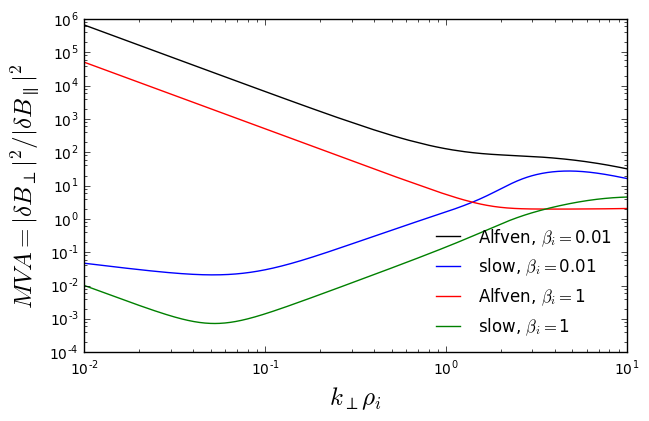

In [45]:
fs = 18
colors = ['black', 'blue', 'red', 'green']
modes = ['Alfven', 'slow', 'Alfven', 'slow']
betas = ['0.01', '0.01', '1', '1']

fig = plt.figure(figsize = [7, 4.3])
for i in range(len(kperp_list)):
    plt.plot(kperp_list[i], mva_list[i], color=colors[i], 
             label = r'{}, $\beta_i = ${}'.format(modes[i], betas[i]))
plt.xlim(0.01, 10)
plt.ylim([1e-4, 1e6])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k_\perp \rho_i$', fontsize = fs)
plt.ylabel(r'$MVA=|\delta B_\perp|^2/ |\delta B_\parallel|^2$', fontsize = fs)
plt.legend(loc='best', frameon=False)
# fig.savefig('../figures/GK_MVA.png', dpi=200)

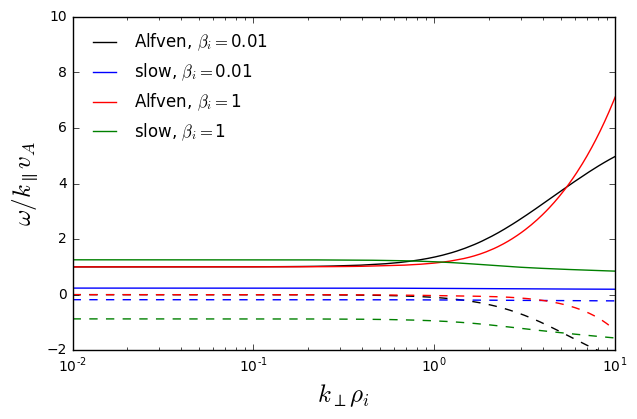

In [47]:
fs = 18
colors = ['black', 'blue', 'red', 'green']
fig = plt.figure(figsize = [7, 4.3])
for i in range(len(kperp_list)):
    plt.plot(kperp_list[i], w_list[i], color = colors[i],
            label = r'{}, $\beta_i = ${}'.format(modes[i], betas[i]))
for i in range(len(kperp_list)):
    plt.plot(kperp_list[i], gamma_list[i], '--', color = colors[i])
plt.xscale('log')
plt.xlabel(r'$k_\perp \rho_i$', fontsize = fs)
plt.ylabel(r'$\omega/k_\parallel v_A$', fontsize = fs)
plt.ylim(-2, 10)
plt.xlim(1e-2, 10)
plt.legend(loc='best', frameon=False)
# fig.savefig('../figures/GK_disp_rel.png', dpi = 200)

## Fitting

- a = energy fraction of Alfven mode = 1-s
- s = energy fraction of slow mode
- ma = $MVA_{Alfven}$
- ms = $MVA_{slow}$
- m = MVA of the mixture

\begin{eqnarray}
m &=& \frac{\delta B_\perp^2}{\delta B_\parallel^2} \\
&=& \frac{(1-s)\times \frac{ma}{1+ma} + s \times \frac{ms}{1+ms}} {(1-s)\times\frac{1}{1+ma} + s \times \frac{1}{1+ms}} \\
&=& \frac{ma(1+ms) - s(ma-ms)}{(1+ms) + s(ma-ms)}
\end{eqnarray}

Hence
$$
s = \frac{(ma-m)(1+ms)}{(1+m)(ma-ms)}
$$

In [35]:
import numpy as np

In [43]:
# file = '/Volumes/yuguang_sd/proj/new_slow_wave_cascade/stampede/new_low_beta/alfven/alfven_large_4a_next.heat'
file = '/Volumes/yuguang_sd/proj/new_slow_wave_cascade/stampede/new_low_beta/mix_080/mix_large_4a.heat'
heat = np.loadtxt(file)

bi = 0.01
per = 2*np.pi*np.sqrt(bi)/1.0
hi, he = heat[:, 22], heat[:, 23]
t = heat[:, 0]/per
print(hi/he)

[        nan -0.43795351 -0.00289489  0.34749989  0.64425066  0.89752066
  1.11309501  1.30001155  1.46018006  1.57894535  1.68293245  1.76959913
  1.84678395  1.91370318  1.95753387  1.99895787  2.04627783  2.07729012
  2.10288613  2.12512108  2.14063565  2.14658764  2.14769683  2.15608096
  2.1538765   2.1540365   2.14164633  2.13111686  2.12811292  2.10567242
  2.0946692   2.08528687  2.06908272  2.04470382  2.01583553  1.9946873
  1.95592338]


/Users/Tong/Envs/ds/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in true_divide


/Users/Tong/Envs/ds/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


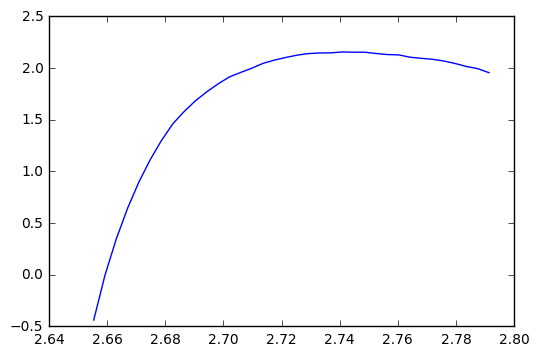

In [44]:
plt.plot(t, hi/he)
# plt.yscale('log')